<a href="https://colab.research.google.com/github/willsacraa/Projeto_ENGG21/blob/main/Wine_Quality_BrunaWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=blue>Análise exploratória de dados

**Dupla: Bruna Climaco e William Sacramento.** <p>

Utilizando o banco de dados do kaggle, sobre a qualidade de vinho. <p>
Objetivo principal: criar um modelo para predizer a qualidade de um vinho, considerando sua composição. Com foco em produtores de vinhos, utilizarem esse modelo para assim analisar a produção com intuito de melhorar a qualidade dos vinhos. <p>
Objetivos secundário: Criarmos modelos de classificação de vinhos em bons e ruins, baseado na escala Robert Parker de qualidade de vinho. <p>
Link: https://www.kaggle.com/rajyellow46/wine-quality <p>


In [1]:
#Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import cm
from wordcloud import WordCloud
import plotly.graph_objects as go
! pip install upsetplot
from upsetplot import UpSet
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy import stats
import math

  Created wheel for upsetplot: filename=UpSetPlot-0.6.0-py3-none-any.whl size=18092 sha256=a5477f8b9ef91091f58bf6b2bed30aaeea635a9d4872e06ca07b2fc07bbfc794
  Stored in directory: /root/.cache/pip/wheels/e8/f9/4a/b71b6b3194361ca612f42135e8e35698ce60144b167dbb19e3
Successfully built upsetplot


Coletando o banco de dados diretamente do GitHub

In [2]:
#Utilizando o github para acessar o banco de dados

!git clone https://github.com/willsacraa/Projeto_ENGG21.git

Cloning into 'Projeto_ENGG21'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


Definindo o banco de dados como um DataFrame.

In [3]:
#Definindo o banco de dados

df = pd.read_csv('Projeto_ENGG21/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Visualizando o banco de dados, vemos que a maioria das variáveis são do tipo numérica, com excessão da variável 'Type'.

In [4]:
#Visualizando cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Aqui vemos quantos valores unicos cada variável possui. Com essa análise, percebemos que duas variáveis aparentam ser categóricas por possuirem poucos valores unicos (Type e Quality)

In [5]:
#Analisando a quantidade de valores unicos de cada variavel
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Tabela estatística dos dados<p>
Nela conseguimos ver que há alguns dados faltantes, pois o nosso DataFrame possui 6497 linhas, porém algumas variáveis possuem menos variavéis do que isso, indicando dados faltantes.

In [6]:
#Analise estatistica
#Tabela descritiva das variáveis
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Dados faltantes



Como vimos anteriormente, havia dados faltantes e já conseguiamos ve-lôs desde a tabela descritiva, porém usando os próximos comandos conseguimos ter certeza disso, bem como analisar a quantidade deles.

In [7]:
#Ver se há dados faltantes 
df.isnull().values.any()

True

In [8]:
#Contagem de dados faltantes por variável
print(df.isna().sum())
print(f'\nTotal de valores missing: {df.isna().sum().sum()}')

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Total de valores missing: 38


In [9]:
# Removendo as linhas com valores missing
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Gráficos Descritivos

Seguindo, faremos gráficos descritivos para analisarmos melhor as variáveis. Mas primeiramente, devemos realizar uma padronização dos dados, pois cada variável possui uma escala e isso atrapalharia a visualização.

In [10]:
#Criando um novo data frame sem a variavel target
df2 = df.drop('quality', axis=1)

#NPadronizar entradas
from sklearn.preprocessing import StandardScaler
var_entrada=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
standardization = StandardScaler()
X_array = standardization.fit_transform(df2[var_entrada])
df2[var_entrada] = pd.DataFrame(X_array,columns = df2[var_entrada].columns).set_index(df2.index)
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922
1,white,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184
2,white,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265
3,white,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
4,white,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,-0.321892,1.703315,-1.643871,-0.745079,0.340545,-0.141736,-1.374580,0.603864,1.255423,1.939871,-0.832184
6492,red,-0.784208,1.581828,-1.643871,-0.724055,0.967807,0.083522,-1.268427,0.067414,1.442179,0.328071,0.006014
6494,red,-0.707155,1.035136,-1.299616,-0.660984,0.568640,-0.085421,-1.339195,0.347301,1.255423,1.469762,0.425113
6495,red,-1.015366,1.855174,-1.368467,-0.724055,0.540129,0.083522,-1.268427,0.257337,2.189203,1.201129,-0.245446


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6691b4afd0>,
      dtype=object)

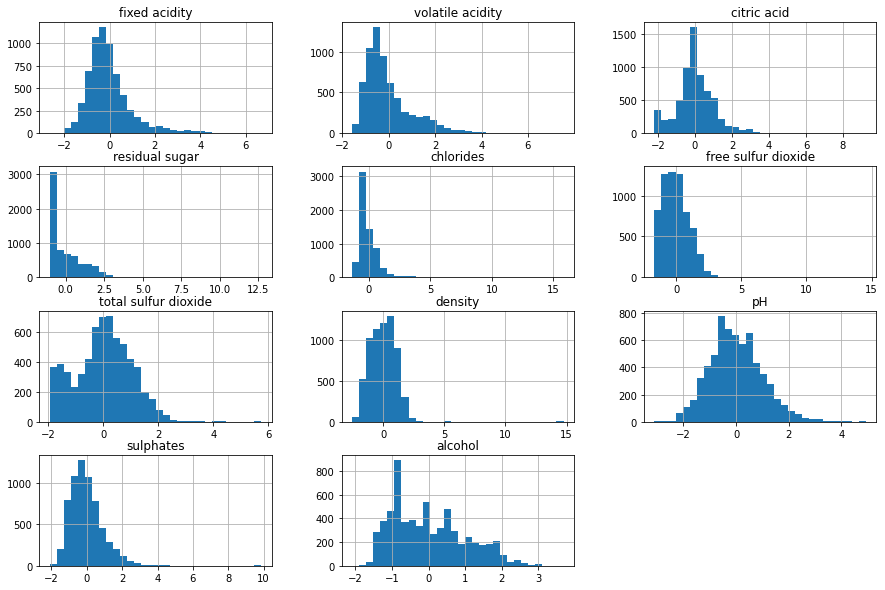

In [11]:
#Histogramas
df2.hist(bins=30, figsize=(15, 10))

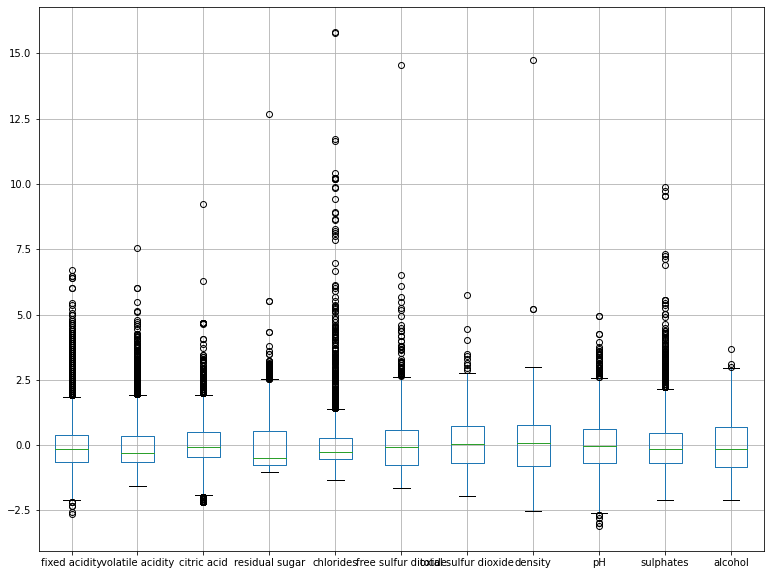

In [12]:
#Boxplots
df2.boxplot(figsize=(13, 10))

Com os dois próximos gráficos, vemos que há mais vinhos brancos do que tinto neste DataFrame

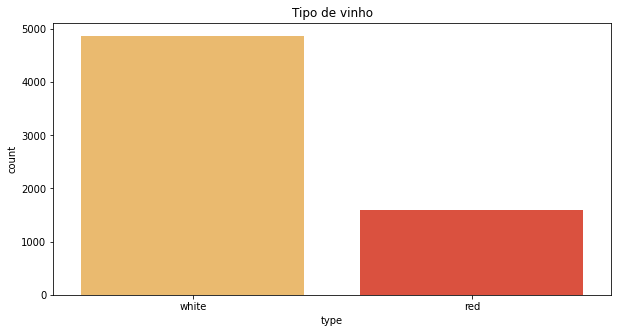

In [13]:
#Gráfico do tipo de vinho
plt.figure(figsize = (10,5))
plt.title("Tipo de vinho")
sns.countplot(x=df['type'], palette = "YlOrRd")

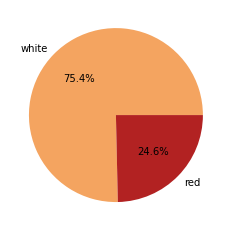

In [14]:
#Gráfico de pizza do tipo de vinho
valores = df['type'].value_counts()
plt.pie(valores,labels=['white','red'],autopct='%1.1f%%',colors=['sandybrown','firebrick'])
plt.show()

No próximo gráfico vemos que os vinhos branco são os que tem o menor pH, maior acidez. Inclusive, podemos perceber isso na realidade, pois os vinhos branco são produzidos pela uva ainda verde, enquanto os tinto com a uva já madura.

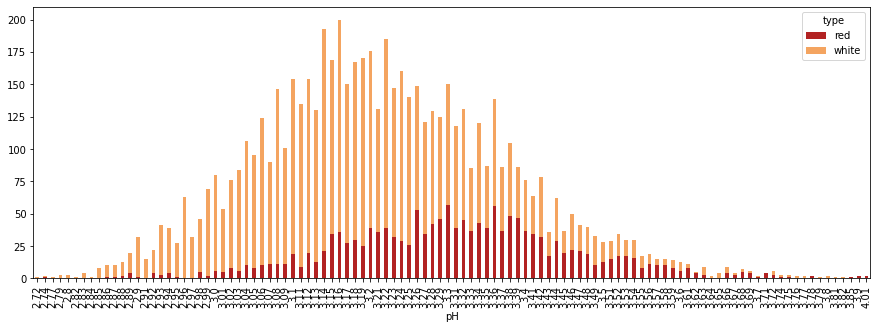

In [15]:
#Grafico de barras -> pH em relação ao type
pd.crosstab(df['pH'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

Analisando o tipo de vinho com a quantidade de ácido cítrico, vemos que os vinhos branco estão concentrados, enquanto os vinhos tinto estão distribuidos.

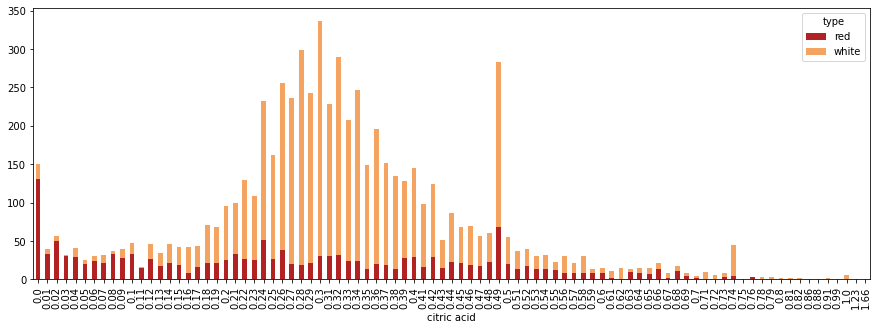

In [16]:
#Grafico de barras -> ácido citrico em relação ao type
pd.crosstab(df['citric acid'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

# Analisando a variável quality separadamente

In [17]:
#Criando um objeto com a variável quality
target = df['quality']
target

0       6
1       6
2       6
3       6
4       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 6463, dtype: int64

In [18]:
#Tabela descritiva
target.describe()

count    6463.000000
mean        5.818505
std         0.873286
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [19]:
#Analisando os valores únicos
target.unique()

array([6, 5, 7, 8, 4, 3, 9])

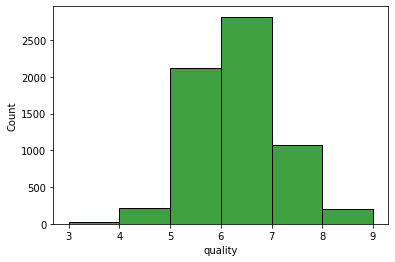

In [20]:
#Histograma
sns.histplot(target, binwidth=1,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


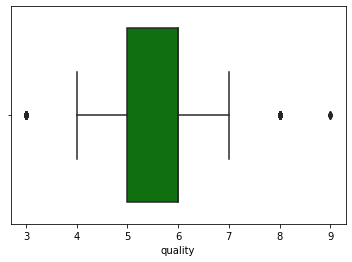

In [21]:
#Boxplot
sns.boxplot(target,color='green')

Já analisando o tipo de vinho com a variável 'Quality', vemos que ambos os tipos estão bem distribuidos.

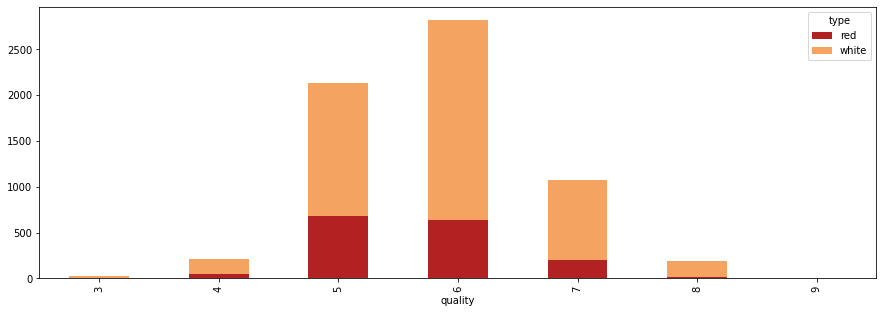

In [22]:
#Grafico de barras -> quality em relação ao type
pd.crosstab(target, df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

In [23]:
bom = df.loc[df['quality'] >= 7].count()
ruim = df.loc[df['quality'] < 7].count()                       

print(bom['quality'],ruim['quality'])

1271 5192


A quantidade de vinhos bons apresentados no banco de dados é de 1271 e a quantidade de vinhos ruins é de 5192.

Agora analisaremos quantos vinhos considerados bons de acordo com a escala Robert Parker (são considerados bons com nota igual ou maior à  70, de acordo com nosso DataFrame, nota igual ou maior à 7), são branco e tinto no nosso DataFrame. <p>
Link sobre a escala de Robert Parker: https://www.divinho.com.br/criticos/robert-parker/

Porcentagem dos valores: 21.64 % de vinhos branco e 13.57 % de vinhos tinto.


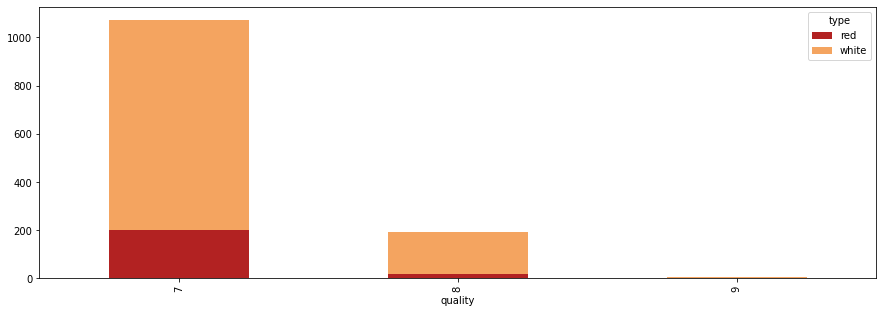

In [24]:
#Analisando qual a porcentagem de vinhos tinto e branco com qualidade maior ou igual a 6

target2 = df.loc[df['quality'] >= 7]
contagem = df.groupby('type').count()
contagem1 = target2.groupby([target2.type == 'red']).count()
contagem = contagem['quality']
contagem1 = contagem1['quality']
print('Porcentagem dos valores:',round(1060/4898*100,2),'% de vinhos branco e',round(217/1599*100,2),'% de vinhos tinto.')

pd.crosstab(target2['quality'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

# Analise de correlação

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


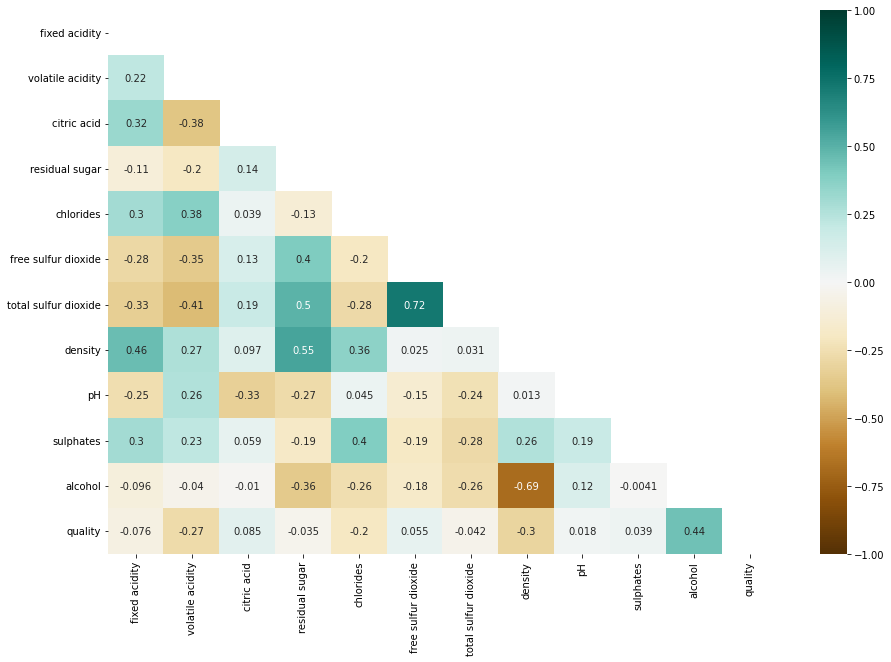

In [25]:
#Criando o gráfico de correlação das variáveis
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG',)

Vemos uma alta correlação nas variáveis 'Free Sulfur Dioxide' e 'Total Sulfur Dioxide', e também nas variáveis 'Density' e 'Residual Sugar'.

In [26]:
#Valores de correlação
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


Podemos ver no gráfico abaixo se as correlações são de causa e efeito. <p>
Como nas variáveis  'Free Sulfur Dioxide' e 'Total Sulfur Dioxide', vemos uma pequena correlação desse tipo, pois o gráfico se assemelha a uma reta, quando uma cresce a outra tende a crescer.

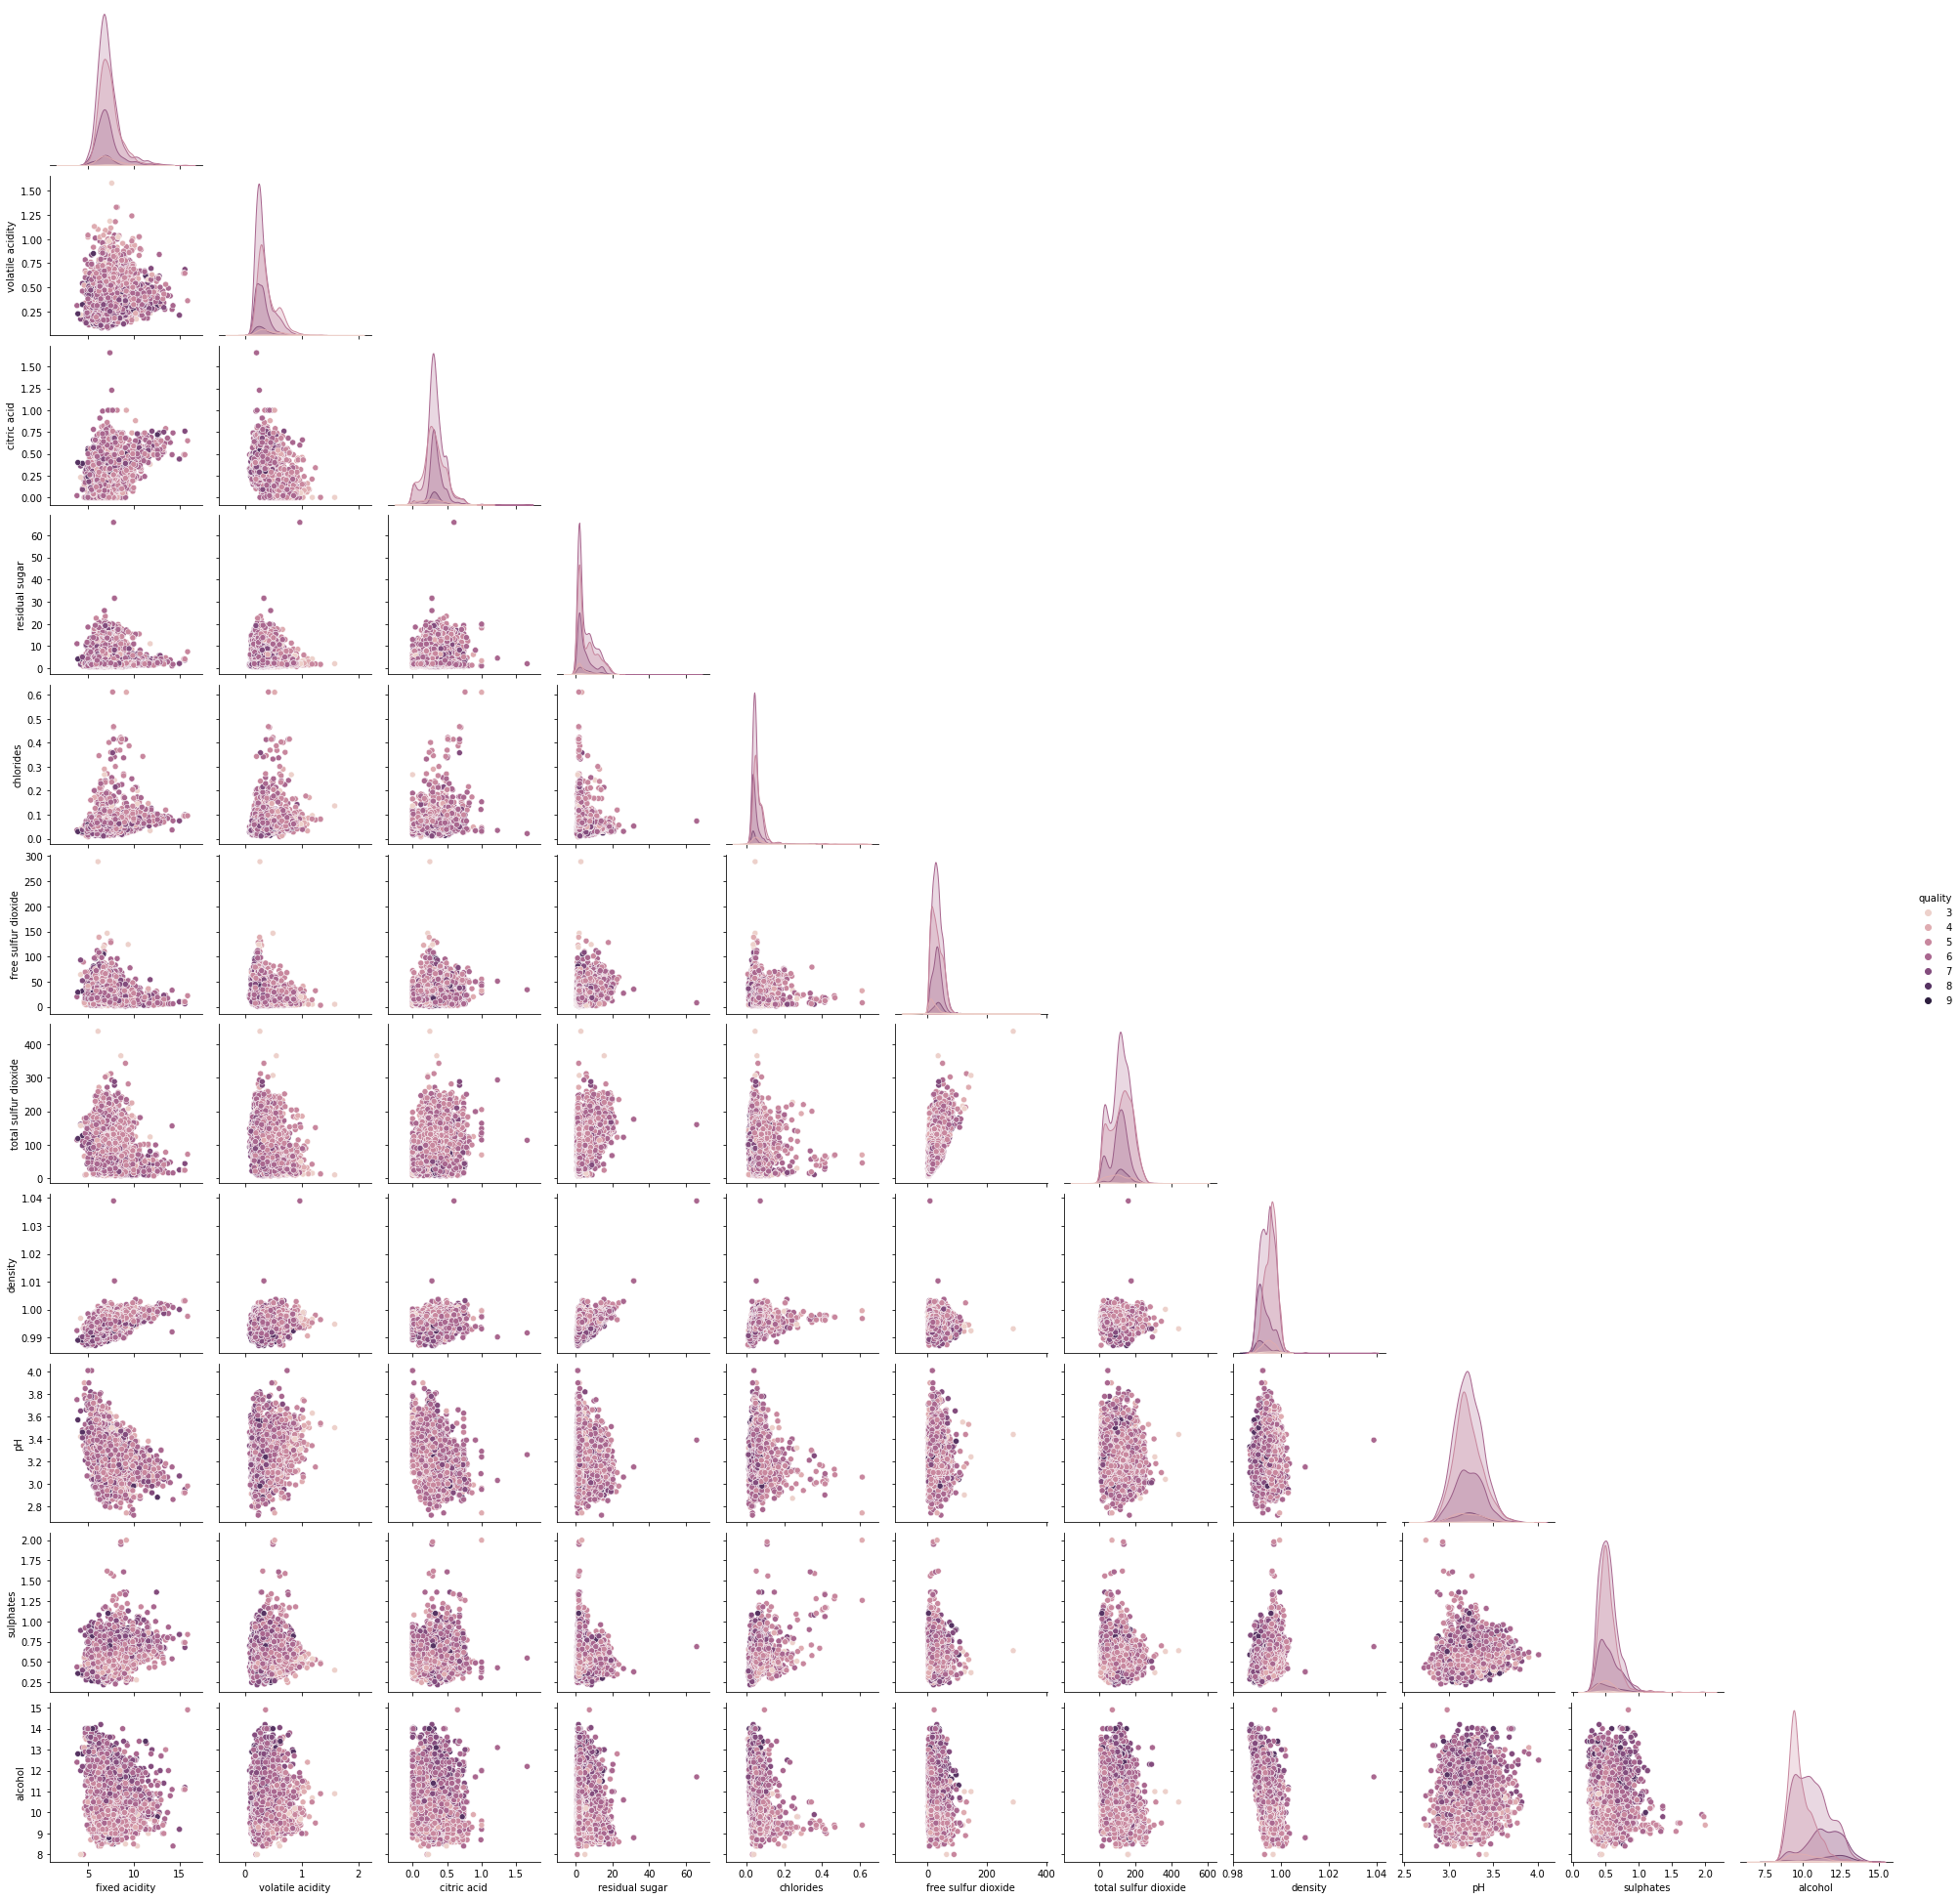

In [27]:
sns.pairplot(df, hue='quality', corner=True)

#<font color=blue> Modelagem do problema - Regressão Linear

Faremos modelos de Regressão Linear com a finalidade de prever a qualidade do vinho tendo em vista sua composição (teor alcoólico, açúcar residual, pH, entre outros) presente no dataset.

Para a realização da regressão do problema, utilizaremos uma regressão simples pelo método de Validation Set Approach, dividindo o dataset em dois conjuntos: treino (70%) e teste (30%).


In [28]:
# Importando sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [29]:
# Definindo X e Y
Y = df['quality']
X = df.drop('quality', axis =1)
X = X.drop('type', axis=1)

In [30]:
# Separação dos conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=15)

Faremos agora uma regressão utilizando um pacote do python, o pacote do Stats Model. Para analisarmos a métrica do R², pelos conjuntos de treino e teste.

In [31]:
# Ajuste utilizando o stats model
import statsmodels.api as sm
mod1 = sm.OLS(Y,X)
result= mod1.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.696e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:08:40   Log-Likelihood:                         -7183.8
No. Observations:                6463   AIC:                                  1.439e+04
Df Residuals:                    6452   BIC:                                  1.446e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Obtemos, utilizando a métrica do R², valores extremamente satisfatórios, com um R² ajustado de 98%.

##2°  Ajuste

Como um segundo ajuste faremos uma nova regressão simples, "excluindo duas variáveis que não apresentaram um P-valor do teste t-student satisfatório (maior de 5%).

In [32]:
# Definindo X e Y
Y2 = df['quality']
X2 = X.drop('fixed acidity', axis =1)
X2 = X2.drop('citric acid', axis=1)

In [33]:
# Separação dos conjuntos de treino e teste
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=.30, random_state=15)

Utilizando o pacote do Stats Model

In [34]:
# Ajuste utilizando o stats model
import statsmodels.api as sm
mod2 = sm.OLS(Y2,X2)
result2= mod2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.517e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:08:40   Log-Likelihood:                         -7185.3
No. Observations:                6463   AIC:                                  1.439e+04
Df Residuals:                    6454   BIC:                                  1.445e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Obtemos, utilizando a métrica do R², valores extremamente satisfatórios, com um R² ajustado de 98%.


# <font color=blue> Modelo de predição para cada tipo de vinhos


Agora iremos avaliar modelos de regressão para cada tipo de vinho.

## Vinho branco

In [35]:
#Dividindo o dataset apenas para o vinho branco
dfbranco = df.drop(df[df['type'] == 'red'].index, axis=0)
dfbranco

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


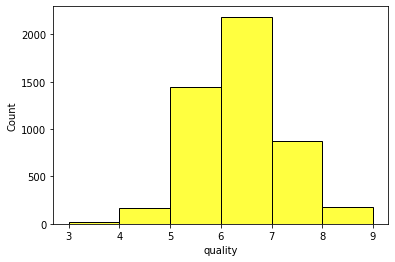

In [36]:
#Avaliando a distribuição pela qualidade
sns.histplot(dfbranco['quality'], binwidth=1,color='yellow')

Regressão:

In [37]:
# Definindo X e Y
Yb = dfbranco['quality']
Xb = dfbranco.drop('quality', axis =1)
Xb = dfbranco.drop('type', axis =1)

In [38]:
# Separação dos conjuntos de treino e teste
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(Xb, Yb, test_size=.30, random_state=15)

In [39]:
# Ajuste utilizando o stats model
import statsmodels.api as sm
modb = sm.OLS(Yb,Xb)
resultB= modb.fit()
print(resultB.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.098e+32
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:08:41   Log-Likelihood:                      1.5101e+05
No. Observations:                4870   AIC:                                 -3.020e+05
Df Residuals:                    4858   BIC:                                 -3.019e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Obtivemos uma regressão com R² de 100%

Agora iremos realizar a modelagem utilizando o método de Árvore de Decisão

In [40]:
from sklearn import tree

#Ajuste
RADb = tree.DecisionTreeRegressor()
RADb.fit(Xb_train,Yb_train)

#Predição
pred_Yb_AD = RADb.predict(Xb_test)
pred_Yb_train_AD = RADb.predict(Xb_train)

#Métrica de Desempenho
from sklearn import metrics
# R²
print('R²:', metrics.r2_score(Yb_test, pred_Yb_AD))

R²: 1.0


Também obtivemos uma regressão com R² de 100%

Dessa maneira partiremos para o vinho do tipo tinto

## Vinho Tinto (Vermelho)

In [41]:
#Separando o dataset somente em vinhos tinto
dftinto = df.drop(df[df['type'] == 'white'].index, axis=0)
dftinto

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


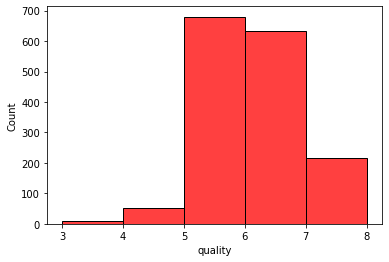

In [42]:
#Distribuição em relação a qualidade
sns.histplot(dftinto['quality'], binwidth=1,color='red')

In [43]:
# Definindo X e Y
Yt = dftinto['quality']
Xt = dftinto.drop('quality', axis =1)
Xt = dftinto.drop('type', axis =1)

In [44]:
# Separação dos conjuntos de treino e teste
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(Xt, Yt, test_size=.30, random_state=15)

Regressão:

In [45]:
# Ajuste utilizando o stats model
import statsmodels.api as sm
modt = sm.OLS(Yt,Xt)
resultT= modt.fit()
print(resultT.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.378e+30
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        21:08:41   Log-Likelihood:                          47693.
No. Observations:                1593   AIC:                                 -9.536e+04
Df Residuals:                    1581   BIC:                                 -9.530e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Obtivemos uma regressão com R² de 100%

Agora faremos uma mesma regressão utilizando o método de Árvore de Decisão

In [46]:
from sklearn import tree

#Ajuste
RADt = tree.DecisionTreeRegressor()
RADt.fit(Xt_train,Yt_train)

#Predição
pred_Yt_AD = RADt.predict(Xt_test)
pred_Yt_train_AD = RADt.predict(Xt_train)

#Métrica de Desempenho
#R²
print('R²:', metrics.r2_score(Yt_test, pred_Yt_AD))

R²: 1.0


Obtivemos também um R² de 100% nessa regressão

# <font color=blue> Classificação

Agora faremos alguns modelos de classificação entre vinhos bons (nota > 6) e ruins (nota <= 6), com finalidade de criarmos modelos capazes de dividir os vinhos em Bons e Ruins, baseado na escala Robert Parker.

## Branco

Inicialmente criaremos uma nova coluna no DataFrame onde vinhos bons terão valor 1 e ruins valor 0

In [47]:
dfbranco['qualidade'] = [1 if x>6 else 0 for x in dfbranco['quality']]
Ycb = dfbranco['qualidade']
Ycb.value_counts()

0    3816
1    1054
Name: qualidade, dtype: int64

In [48]:
Xcb = dfbranco.drop(['type', "quality", "qualidade"], axis=1)

### Agora faremos a classificação usando Validation Set Approach - Árvores de Decisão

Avaliando o modelo -----------------------
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       763
           1       0.59      0.55      0.57       211

    accuracy                           0.82       974
   macro avg       0.73      0.72      0.73       974
weighted avg       0.82      0.82      0.82       974



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


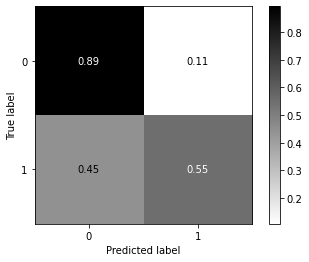

In [49]:
# Pré processamento 2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
seed = 5
## Dividindo o dataset em treino e validação
xcb_train, xcb_valid, ycb_train, ycb_valid = train_test_split(Xcb, Ycb, 
                                                      stratify=Ycb, 
                                                      random_state = seed, 
                                                      test_size = 0.20)

# Treinando o modelo (árvore de decisão)
modelo = DecisionTreeClassifier(random_state = seed)
modelo = modelo.fit(xcb_train, ycb_train)
#modelo1 = modelo
# Predição e avaliação do modelo
ycb_valid_pred = modelo.predict(xcb_valid)
## print classification report
print('Avaliando o modelo -----------------------\n', classification_report(ycb_valid, ycb_valid_pred))
##Confusion Matrix
plot_confusion_matrix(modelo, xcb_valid, ycb_valid, normalize='true', cmap='binary')
plt.show();

In [50]:
#Salvando a acurácia do modelo para comparar no final
from sklearn.metrics import accuracy_score

Acuracia = pd.DataFrame(columns=["type", "accuracy"])

score1 = accuracy_score(ycb_valid, ycb_valid_pred)
print("Acurácia do modelo:", score1)
Acuracia = Acuracia.append({"type": "White - VSA", "accuracy": score1}, ignore_index=True)

Acurácia do modelo: 0.8203285420944558


### Agora faremos uma nova classificação utilizando o método K-fold, com k = 5, e árvore de decisão

In [51]:
# Modelagem
from sklearn.model_selection import GridSearchCV
# Importando o Make Scorer
from sklearn.metrics import make_scorer
# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}


# Definindo o 'K' para o K-Fold
k = 5
## Defining parameter range to grid search
param_grid = [{'splitter': ['best', 'random']}]
# Treinando o modelo (árvore de decisão)
clf = DecisionTreeClassifier(random_state = seed)
modelo_1 = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring = meus_scores,
                      refit = 'f1',
                      cv=k)
modelo_1.fit(Xcb, Ycb);
modelo_1 = modelo_1
# Results
print('Model =', modelo_1.best_params_)
display(pd.DataFrame(modelo_1.cv_results_)[['params', 'mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']])

Model = {'splitter': 'best'}


,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,{'splitter': 'best'},0.748255,0.429836,0.442018,0.429397
1,{'splitter': 'random'},0.735113,0.399988,0.419296,0.404551


Avaliando o modelo -----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3816
           1       1.00      1.00      1.00      1054

    accuracy                           1.00      4870
   macro avg       1.00      1.00      1.00      4870
weighted avg       1.00      1.00      1.00      4870



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


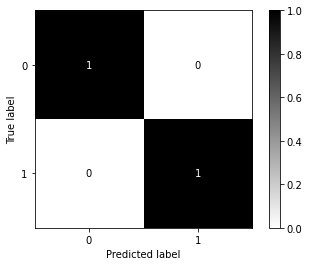

In [52]:
data_modelo, Teste = train_test_split(dfbranco, 
                                     stratify=dfbranco['qualidade'], 
                                     random_state = seed, 
                                     test_size = 0.1)

## Definindo entradas e saída
### Saída
ycb_test = Ycb
### Entradas
xcb_test = Xcb


# Predição e avaliação do modelo 2
y_mod_1 = modelo_1.predict(xcb_test)
## print classification report
print('Avaliando o modelo -----------------------\n', classification_report(ycb_test, y_mod_1))
##Confusion Matrix
plot_confusion_matrix(modelo_1, xcb_test, ycb_test, normalize='true', cmap='binary')
plt.show();

In [53]:
#Salvando a acurácia do modelo para comparar no final
score1_2 = accuracy_score(ycb_test, y_mod_1)
print("Acurácia do modelo:", score1_2)
Acuracia = Acuracia.append({"type": "White - K-fold", "accuracy": score1_2}, ignore_index=True)

Acurácia do modelo: 1.0


## Tinto

Inicialmente criaremos uma nova coluna no DataFrame onde vinhos bons terão valor 1 e ruins valor 0

In [54]:
dftinto['qualidade'] = [1 if x>6 else 0 for x in dftinto['quality']]
Yct = dftinto['qualidade']
Yct.value_counts()

0    1376
1     217
Name: qualidade, dtype: int64

In [55]:
Xct = dftinto.drop(['type', "quality", "qualidade"], axis=1)

### Agora faremos a classificação usando Validation Set Approach - Árvores de Decisão

Avaliando o modelo -----------------------
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       276
           1       0.56      0.53      0.55        43

    accuracy                           0.88       319
   macro avg       0.74      0.73      0.74       319
weighted avg       0.88      0.88      0.88       319



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


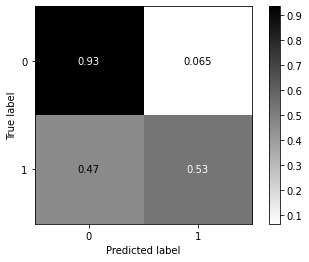

In [56]:
# Pré processamento 2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
seed = 5
## Dividindo o dataset em treino e validação
xct_train, xct_valid, yct_train, yct_valid = train_test_split(Xct, Yct, 
                                                      stratify=Yct, 
                                                      random_state = seed, 
                                                      test_size = 0.20)

# Treinando o modelo (árvore de decisão)
modelo2 = DecisionTreeClassifier(random_state = seed)
modelo2 = modelo.fit(xct_train, yct_train)
#modelo1 = modelo
# Predição e avaliação do modelo
yct_valid_pred = modelo2.predict(xct_valid)
## print classification report
print('Avaliando o modelo -----------------------\n', classification_report(yct_valid, yct_valid_pred))
##Confusion Matrix
plot_confusion_matrix(modelo2, xct_valid, yct_valid, normalize='true', cmap='binary')
plt.show();

In [57]:
#Salvando a acurácia do modelo para comparar no final

score2 = accuracy_score(yct_valid, yct_valid_pred)
print("Acurácia do modelo:", score2)
Acuracia = Acuracia.append({"type":"Red - VSA", "accuracy": score2}, ignore_index=True)

Acurácia do modelo: 0.8808777429467085


### Agora faremos uma nova classificação utilizando o método K-fold, com k = 5, e árvore de decisão

In [58]:
# Modelagem
from sklearn.model_selection import GridSearchCV
# Importando o Make Scorer
from sklearn.metrics import make_scorer
# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}


# Definindo o 'K' para o K-Fold
k = 5
## Defining parameter range to grid search
param_grid = [{'splitter': ['best', 'random']}]
# Treinando o modelo (árvore de decisão)
clf = DecisionTreeClassifier(random_state = seed)
modelo_2 = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring = meus_scores,
                      refit = 'f1',
                      cv=k)
modelo_2.fit(Xct, Yct);
modelo_2 = modelo_2
# Results
print('Model =', modelo_2.best_params_)
display(pd.DataFrame(modelo_2.cv_results_)[['params', 'mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_f1']])

Model = {'splitter': 'random'}


,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,{'splitter': 'best'},0.809132,0.375304,0.38203,0.338076
1,{'splitter': 'random'},0.816054,0.381974,0.42389,0.384001


Avaliando o modelo -----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00       217

    accuracy                           1.00      1593
   macro avg       1.00      1.00      1.00      1593
weighted avg       1.00      1.00      1.00      1593



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


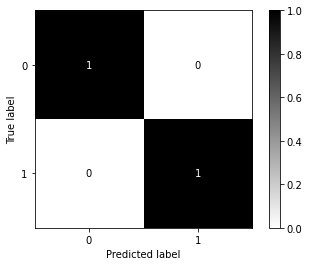

In [59]:
data_modelo, Teste_tinto = train_test_split(dftinto, 
                                     stratify=dftinto['qualidade'], 
                                     random_state = seed, 
                                     test_size = 0.1)

## Definindo entradas e saída
### Saída
yct_test = Yct
### Entradas
xct_test = Xct


# Predição e avaliação do modelo 2
y_mod_2 = modelo_2.predict(xct_test)
## print classification report
print('Avaliando o modelo -----------------------\n', classification_report(yct_test, y_mod_2))
##Confusion Matrix
plot_confusion_matrix(modelo_2, xct_test, yct_test, normalize='true', cmap='binary')
plt.show();

In [60]:
#Salvando a acurácia do modelo para comparar no final
score2_2 = accuracy_score(yct_test, y_mod_2)
print("Acurácia do modelo:", score2_2)
Acuracia = Acuracia.append({"type": "Red - K-fold", "accuracy": score2_2}, ignore_index=True)

Acurácia do modelo: 1.0


## Acurácia dos Classificadores de cada tipo

Aqui faremos a comparação dos modelos de classificação por tipo

In [61]:
Acuracia

,type,accuracy
0,White - VSA,0.820329
1,White - K-fold,1.000000
2,Red - VSA,0.880878
3,Red - K-fold,1.000000


# Conclusão

Dessa forma obtivemos ótimos modelos de regressão para cada tipo de vinho, analisando o R² que é 100%, logo temos um modelo muito bom para prever a qualidade do vinho. <p>
E também tivemos bons modelos de classificação, tanto pelo Validation Set Approach quanto pelo K-fold, e temos modelos muito bons para classificar um vinho como bom ou ruim. <p>
Logo, conseguimos obter nosso objetivo e nas férias a gente vai conhecer mais do site que Lucas falou, para que qualquer pessoa possa utilizar nosso modelo para classificar o vinho em bom ou ruim visto a composição dele.